In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import copy

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [40]:
train = pd.read_csv("../data/dacon_parking_demand_dataset/train.csv")
test = pd.read_csv("../data/dacon_parking_demand_dataset/test.csv")
sub = pd.read_csv("../data/dacon_parking_demand_dataset/test.csv")
age = pd.read_csv("../data/dacon_parking_demand_dataset/age_gender_info.csv")

In [41]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [42]:
# 오류1번 트레인 셋 처리
# 총세대수와 전용면적별 세대수 합이 다른 단지코드의 값을 -> 전용면적별세대수의 합으로 수정하기

def house_number_correction(df):
    error_1_group = df.groupby("단지코드")[["총세대수"]]
    total_number_house_hold = error_1_group.mean()

    error_2_group = df.groupby("단지코드")["전용면적별세대수"]
    sum_house_hold = error_2_group.sum()

    check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
    different_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

    total_house_index = different_df.index
    total_house_number = []
    for v in different_df.values:
        total_house_number.append(v[1])
    
    for code, value in zip(total_house_index, total_house_number):
         df.loc[df["단지코드"] == code, "총세대수"] = value
    
    return df

train = house_number_correction(train)
test = house_number_correction(test)

In [43]:
error_1_group = train.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = train.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

print(check_df.shape)
check_df

(0, 2)


,총세대수,전용면적별세대수
단지코드,,


In [44]:
error_1_group = test.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = test.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

check_df.shape

(0, 2)

In [45]:
# 오류2번 3번 처리하기

train[(train["단지코드"] == "C2675") | (train["단지코드"] == "C2335") | (train["단지코드"] == "C1327")]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [46]:
test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0


In [47]:
# 테스트 데이터 셋에서 세개의 코드 데이터를 없애기 (2, 3번 3개 코드 제거)

error_index = test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].index
test = test.drop(index=error_index, axis=0)

In [48]:
# 에러2번의 5개 단지코드 트레인 셋 제거

train_set_error_index = train[(train["단지코드"] =="C2085") | (train["단지코드"] =="C1397") | (train["단지코드"] =="C2431") | (train["단지코드"] =="C1649") | (train["단지코드"] =="C1036")].index
train = train.drop(index=train_set_error_index, axis=0)

In [49]:
# 에러3번의 트레인 셋 7개 단지 코드 제거

train_set_error_index = train[(train["단지코드"] =="C1095") | (train["단지코드"] =="C2051") | (train["단지코드"] =="C1218") | (train["단지코드"] =="C1894") | (train["단지코드"] =="C2483") | (train["단지코드"] =="C1502") | (train["단지코드"] =="C1988")].index
train = train.drop(index=train_set_error_index, axis=0)

In [50]:
# 자격 유형 피처 전처리

test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [51]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [52]:
# 임대보증금 피처 전처리

train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

train_df["임대보증금"] = train_df["임대보증금"].fillna(0)
train_df.loc[train_df["임대보증금"] == "-", "임대보증금"] = 0
train_df["임대보증금"] = train_df["임대보증금"].astype(int)

test_df["임대보증금"] = test_df["임대보증금"].fillna(0)
test_df.loc[test_df["임대보증금"] == "-", "임대보증금"] = 0
test_df["임대보증금"] = test_df["임대보증금"].astype(int)

In [53]:
# 레이블 인코딩인데, 원핫 인코딩으로 바꿔보기

qualification_type_feature = pd.get_dummies(train_df["자격유형"])
train_df = pd.concat([train_df, qualification_type_feature], axis=1)

qualification_type_feature = pd.get_dummies(test_df["자격유형"])
test_df = pd.concat([test_df, qualification_type_feature], axis=1)

test_df["B"] = 0
test_df["F"] = 0
test_df["O"] = 0

In [54]:
train_df.shape, test_df.shape

((2869, 30), (1008, 29))

In [55]:
# 실거주 세대수 피처 생성

train_df["실거주세대수"] = train_df["총세대수"] - train_df["공가수"].astype(int)
train_df.loc[train_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

test_df["실거주세대수"] = test_df["총세대수"] - test_df["공가수"].astype(int)
test_df.loc[test_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

In [56]:
# 세대수 별 주차면수 피처 생성

train_df["세대수비율주차면수"] = (train_df["전용면적별세대수"] / train_df["실거주세대수"]) * train_df["단지내주차면수"]
test_df["세대수비율주차면수"] = (test_df["전용면적별세대수"] / test_df["실거주세대수"]) * test_df["단지내주차면수"]

In [57]:
# 버스정류장 피처 전처리
# 최빈값인 2로 채우기

train_df["도보 10분거리 내 버스정류장 수"] = train_df["도보 10분거리 내 버스정류장 수"].fillna(2)
test_df["도보 10분거리 내 버스정류장 수"] = test_df["도보 10분거리 내 버스정류장 수"].fillna(2)

In [58]:
# 전철역 피처 전처리
# Null 값 0으로 채우기

train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)
test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)

<AxesSubplot:>

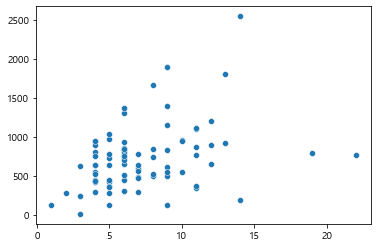

In [59]:
area_group = train_df.groupby("지역")["등록차량수"]

values = area_group.get_group("경기도").value_counts().index
counts = area_group.get_group("경기도").value_counts().values

sns.scatterplot(x=counts, y=values)

In [60]:
# 지역 피처 원핫 인코딩

area_df = pd.get_dummies(train_df["지역"])
area_df = area_df.drop("서울특별시", axis=1)
train_df = pd.concat([train_df, area_df], axis=1)

area_df = pd.get_dummies(test_df["지역"])
test_df = pd.concat([test_df, area_df], axis=1)

In [61]:
# 임대건물 구분 피처 전처리 (아파트, 상가 원핫 인코딩)

train_df = pd.concat([train_df, pd.get_dummies(train_df["임대건물구분"])], axis=1)
train_df.drop("임대건물구분", axis=1, inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df["임대건물구분"])], axis=1)
test_df.drop("임대건물구분", axis=1, inplace=True)

In [62]:
# 세대수 규모 당 총 전용 면적 피처 생성

train_df["세대수 규모 당 총 전용면적"] = train_df["전용면적"] * train_df["전용면적별세대수"]
test_df["세대수 규모 당 총 전용면적"] = test_df["전용면적"] * test_df["전용면적별세대수"]

In [63]:
# 단지별 총 전용 면적 피처 생성

train_df["단지별 총 전용면적"] = train_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)
test_df["단지별 총 전용면적"] = test_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)

In [64]:
# 전용면적 당 차량등록수 피처 생성

train_df["전용면적 당 차량등록수"] = (train_df["세대수 규모 당 총 전용면적"] / train_df["단지별 총 전용면적"]) * train_df["등록차량수"]

In [65]:
# X_train & X_test 셋 선택

X_train_df_sel = train_df.drop(["단지코드", "지역", "공급유형", "전용면적", "자격유형", "임대료",
                                "단지내주차면수", "등록차량수", "전용면적 당 차량등록수"], axis=1)

X_test_df_sel = test_df.drop(["단지코드", "지역", "공급유형", "전용면적", "자격유형", "임대료",
                              "단지내주차면수"], axis=1)

y_train_df = train_df["전용면적 당 차량등록수"]

In [66]:
X_train_df_sel.columns

Index(['총세대수', '전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '강원도', '경기도', '경상남도',
       '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가', '아파트', '세대수 규모 당 총 전용면적',
       '단지별 총 전용면적'],
      dtype='object')

In [67]:
column_names = ['총세대수', '전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '강원도', '경기도', '경상남도',
       '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가', '아파트', '세대수 규모 당 총 전용면적',
       '단지별 총 전용면적']

X_test_df_sel = X_test_df_sel.reindex(columns=column_names)
X_test_df_sel.columns

Index(['총세대수', '전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '강원도', '경기도', '경상남도',
       '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가', '아파트', '세대수 규모 당 총 전용면적',
       '단지별 총 전용면적'],
      dtype='object')

In [68]:
X_train_df_sel

,총세대수,전용면적별세대수,공가수,임대보증금,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,A,B,C,D,...,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,상가,아파트,세대수 규모 당 총 전용면적,단지별 총 전용면적
8,545,276,17.0,9216000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,9240.48,21941.82
9,545,60,17.0,12672000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,2376.00,21941.82
10,545,20,17.0,12672000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,792.00,21941.82
11,545,38,17.0,18433000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1782.20,21941.82
12,545,19,17.0,18433000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,891.10,21941.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,239,19,7.0,11346000.0,0.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,934.80,12283.42
2948,239,34,7.0,14005000.0,0.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1736.72,12283.42
2949,239,34,7.0,14005000.0,0.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1758.82,12283.42
2950,239,114,7.0,14005000.0,0.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,5923.44,12283.42


In [71]:
# 전처리 후 표준화 전에 분석에 필요한 피처만 선택하여 추출

X_train_df_sel.to_csv("X_train_df.csv")
X_test_df_sel.to_csv("X_test_df.csv")
y_train_df.to_csv("y_train_df.csv")

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_df_sel)

X_train_df_scaled = scaler.transform(X_train_df_sel)
X_test_df_scaled = scaler.transform(X_test_df_sel)
X_test_df_scaled[:5]

array([[-0.24854825,  0.09980247,  0.1015166 , -0.07385873, -0.40235963,
        -0.6388798 , -1.23153021, -0.08586964, -0.1850583 , -0.49738446,
        -0.11430211, -0.03235359, -0.05609682,  4.18445665, -0.13181763,
        -0.19297121, -0.10787079, -0.10787079, -0.02641199, -0.10279641,
        -0.01867284, -0.25095121,  0.21128301, -0.26405319,  1.95495492,
        -0.38059474, -0.20061544, -0.22734603, -0.19199747, -0.31967136,
        -0.35928128, -0.0918469 , -0.10951231, -0.23238849, -0.19872784,
        -0.18099   , -0.24141474, -0.24543128, -0.49356501,  0.49356501,
         0.03488239,  0.10509177],
       [-0.24854825, -0.54553172,  0.1015166 ,  0.66893512, -0.40235963,
        -0.6388798 ,  0.81199794, -0.08586964, -0.1850583 , -0.49738446,
        -0.11430211, -0.03235359, -0.05609682, -0.23897965, -0.13181763,
        -0.19297121, -0.10787079, -0.10787079, -0.02641199, -0.10279641,
        -0.01867284, -0.25095121, -0.55080313, -0.26405319,  1.95495492,
        -0.38059

### 랜덤포레스트회귀 모델 103.6996535256

In [244]:
# 최고 스코어 모델 -> 피처 42개 적용 및 모델 디폴트 설정으로 학습

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train_df_scaled, y_train_df)
pred = model.predict(X_test_df_scaled)

result = pd.DataFrame(data=pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("rf_regressor_0719.csv", index=False)

sub_df

,code,num
0,C1072,774.758003
1,C1128,1326.299404
2,C1456,564.642018
3,C1840,488.050219
4,C1332,1232.187366
...,...,...
145,C2456,254.745346
146,C1266,393.513184
147,C2152,55.072748
148,C1267,397.565204


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_train_df_scaled, y_train_df, test_size=0.25,
                                                    random_state=42)

# parameters = {"n_estimators": [100, 200, 300, 500],
#               "max_depth": [None, 3, 5, 7, 10],
#               "min_samples_split": [2, 5, 10, 20]}


# model = RandomForestRegressor(n_jobs=-1, random_state=42)
# grid_model = GridSearchCV(model, param_grid=parameters, cv=3)
# grid_model.fit(X_train, y_train)

In [280]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.465324,1.869882,0.013298,4.701903e-04,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.873588,0.885479,0.858166,0.872411,0.011182,14
1,0.283243,0.017062,0.021941,8.141014e-04,None,2,200,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.874376,0.887882,0.859236,0.873831,0.011701,9
2,0.408242,0.015415,0.031582,4.708084e-04,None,2,300,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.874070,0.888689,0.860382,0.874381,0.011558,7
3,0.690162,0.027047,0.050531,4.705836e-04,None,2,500,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.875467,0.887694,0.861823,0.874995,0.010567,1
4,0.130612,0.002850,0.013500,9.164072e-04,None,5,100,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.870910,0.886362,0.858419,0.871897,0.011429,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.562164,0.028563,0.070146,2.515620e-02,10,10,500,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.864658,0.882532,0.863508,0.870233,0.008710,26
76,0.112708,0.002939,0.013146,2.753743e-04,10,20,100,"{'max_depth': 10, 'min_samples_split': 20, 'n_...",0.849821,0.867980,0.865412,0.861071,0.008024,55
77,0.218417,0.027506,0.021608,4.697969e-04,10,20,200,"{'max_depth': 10, 'min_samples_split': 20, 'n_...",0.850048,0.869184,0.866329,0.861854,0.008429,51
78,0.306514,0.028691,0.031915,4.495664e-07,10,20,300,"{'max_depth': 10, 'min_samples_split': 20, 'n_...",0.849483,0.868263,0.864894,0.860880,0.008175,58


In [281]:
grid_model.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [283]:
from sklearn.metrics import mean_absolute_error

rf_best = grid_model.best_estimator_

pred = rf_best.predict(X_test)

In [285]:
mean_absolute_error(pred, y_test)

15.950975936777143

In [286]:
rf_model = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=None, random_state=42)
rf_model.fit(X_train_df_scaled, y_train_df)
pred = rf_model.predict(X_test_df_scaled)

result = pd.DataFrame(data=pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("rf_regressor_parameter optimization_0719.csv", index=False)

sub_df

,code,num
0,C1072,775.805845
1,C1128,1312.738117
2,C1456,564.213970
3,C1840,494.019631
4,C1332,1207.204622
...,...,...
145,C2456,254.849346
146,C1266,394.142528
147,C2152,51.785465
148,C1267,401.939461


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, loss="lad", min_samples_split=2, random_state=42)
gb_model.fit(X_train_df_scaled, y_train_df)
pred = gb_model.predict(X_test_df_scaled)

result = pd.DataFrame(data=pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("GradientBoostingRegressor_0720.csv", index=False)

sub_df

,code,num
0,C1072,754.981115
1,C1128,1216.313302
2,C1456,559.866057
3,C1840,496.600392
4,C1332,1179.939633
...,...,...
145,C2456,260.811107
146,C1266,400.694082
147,C2152,58.643246
148,C1267,344.265680


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingRegressor(loss="lad", random_state=42)
parameters = {"learning_rate": [0.01, 0.03, 0.05, 1.0, 2.0, 5.0],
              "n_estimators": [100, 200, 300, 400, 500]}
grid = GridSearchCV(gb_model, param_grid=parameters, cv=3)
grid.fit(X_train, y_train)

C:\Users\HYUNJUN\anaconda3\envs\likelion\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\HYUNJUN\anaconda3\envs\likelion\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\HYUNJUN\anaconda3\envs\likelion\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\HYUNJUN\anaconda3\envs\likelion\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\HYUNJUN\anaconda3\envs\likelion\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).su

GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(loss='lad', random_state=42),
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 1.0, 2.0, 5.0],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [38]:
print(grid.best_params_)
gb_best = grid.best_estimator_
pred = gb_best.predict(X_test_df_scaled)

result = pd.DataFrame(data=pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("GradientBoostingRegressor with gridsearch_0720.csv", index=False)

sub_df

{'learning_rate': 0.05, 'n_estimators': 500}


,code,num
0,C1072,749.252101
1,C1128,1298.537068
2,C1456,508.921070
3,C1840,506.033658
4,C1332,1161.370868
...,...,...
145,C2456,240.474021
146,C1266,424.966866
147,C2152,65.289823
148,C1267,390.044439


In [337]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_absolute_error(pred, y_test)

15.994010876279114

In [338]:
from sklearn.linear_model import Ridge, Lasso

parameters = {"alpha": [0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10]}
ridge_model = Ridge()

grid_model = GridSearchCV(ridge_model, param_grid=parameters, cv=3)
grid_model.fit(X_train, y_train)

grid_model.best_params_

{'alpha': 5}

In [343]:
ridge_best = grid_model.best_estimator_
pred = ridge_best.predict(X_test)

mean_absolute_error(pred, y_test)

20.25568295624673